In [11]:
import sys
import os
import json
from visualization import *

In [12]:
sys.path.append('Markov/')

In [3]:
from markovchain import *

In [22]:
data_path="Data/datasetC.json"

In [23]:
with open(data_path, "r") as f:
    training_data=json.load(f)
print(len(training_data))
'''lenlist=[]
maxlen=0
imax=0
minlen=len(training_data[0].split(", "))
imin=0
for i in range(len(training_data)):
    melody=training_data[i].split(", ")
    lenlist.append(len(melody))
    if maxlen<len(melody):
        maxlen=len(melody)
        imax=i
    if minlen>len(melody):
        minlen=len(melody)
        imin=i
print(max(lenlist))
print(imax)
print(min(lenlist))
print(imin)
'''

98


'lenlist=[]\nmaxlen=0\nimax=0\nminlen=len(training_data[0].split(", "))\nimin=0\nfor i in range(len(training_data)):\n    melody=training_data[i].split(", ")\n    lenlist.append(len(melody))\n    if maxlen<len(melody):\n        maxlen=len(melody)\n        imax=i\n    if minlen>len(melody):\n        minlen=len(melody)\n        imin=i\nprint(max(lenlist))\nprint(imax)\nprint(min(lenlist))\nprint(imin)\n'

In [26]:
states=extract_states(training_data)
model=MarkovChainMelodyGenerator(states)
model.train(training_data)

In [8]:
generated_melody = model.generate(100)
generated_melody_string=generated_to_string(generated_melody)
print(generated_melody_string)

A5-0.25, F5-0.5, D5-0.5, A4-0.5, E4-0.5, G#4-0.5, rest-0.25, G5-0.25, F5-0.25, C#5-0.5, E5-0.25, E5-0.25, D5-0.25, D5-0.5, E5-0.5, rest-0.5, D5-0.5, D#5-0.25, B4-0.25, C#5-0.25, C#5-0.25, E5-0.25, D5-0.5, D5-0.5, E5-0.25, F#5-0.25, D5-0.25, G5-0.25, A-5-0.25, G5-0.25, G5-0.25, G5-0.5, C#5-0.25, E5-0.25, C#5-0.25, E-5-0.25, G4-0.25, A4-0.25, G#4-0.25, A4-0.25, E4-0.25, A4-0.25, A4-0.25, F#5-0.25, E5-0.25, G5-0.25, F#5-0.25, F#5-0.25, E5-0.25, D5-0.25, E5-0.25, E5-0.25, D5-0.25, C5-0.25, A4-0.25, G4-0.25, G#4-0.25, A4-0.25, D5-0.25, G4-0.25, A4-0.25, A4-0.25, G#4-0.25, G#4-0.25, B4-0.25, C#5-0.25, D5-0.5, E5-0.25, B4-0.25, E5-0.25, E5-1.0, rest-0.25, E5-0.25, E5-1.0, rest-0.25, G#5-0.25, A5-0.25, A4-0.25, C#5-0.5, E5-0.5, G5-0.5, G5-0.5, G5-0.5, A#4-0.25, B4-0.25, D5-0.25, E5-0.25, B-4-0.25, G4-0.25, F4-0.25, C5-0.25, B-4-0.25, B4-0.25, B4-0.25, rest-0.25, C5-0.25, D5-0.25, D5-0.25, D5-0.25, C5-0.25


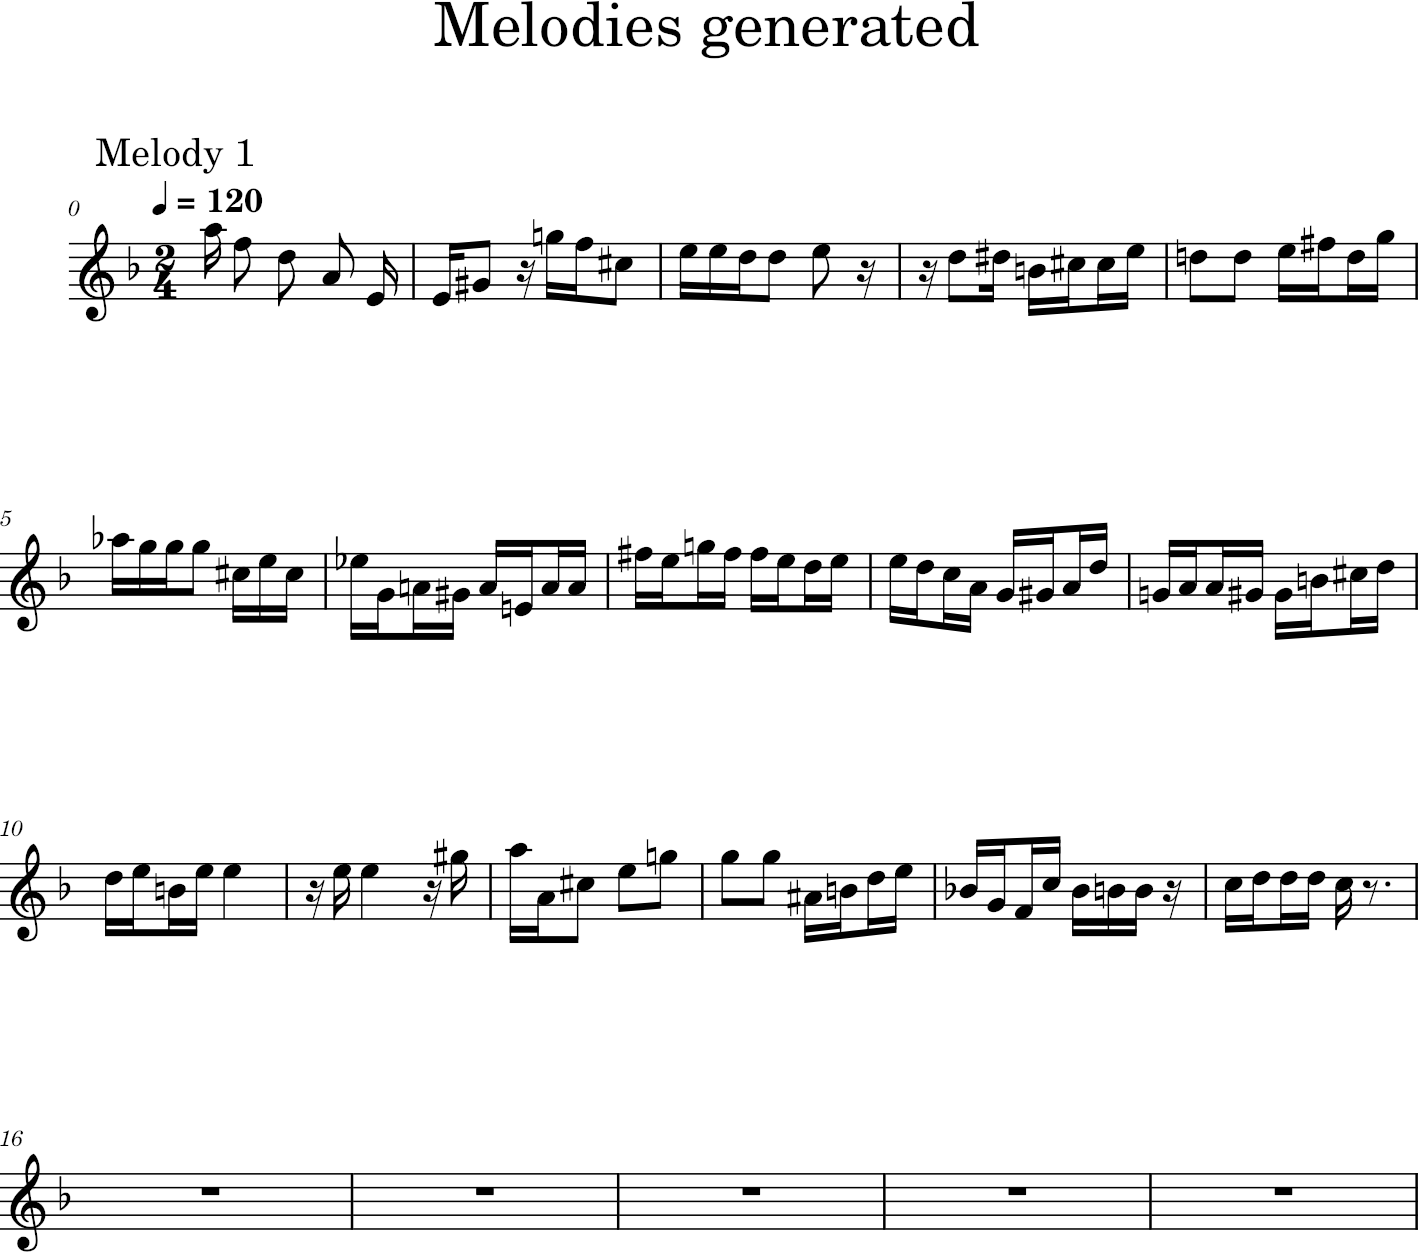

In [9]:
visualize("2/4",["F"],[generated_melody_string]).show()

In [17]:
#Folk (Windows)
music21.environment.set('musescoreDirectPNGPath',str(os.path.join("C:\\", "Program Files","MuseScore 4","bin","MuseScore4.exe")))
music21.environment.set('musicxmlPath', str(os.path.join("C:\\", "Program Files","MuseScore 4","bin","MuseScore4.exe")))
visualize("2/4",["E"],[generated_melody_string]).show("musicxml")

In [27]:
title="Markov_C"
part="C"
key="F"
generated_melodies=[model.generate(60) for _ in range(40)]
generated_to_json(title,generated_melodies,key=key,part=part)